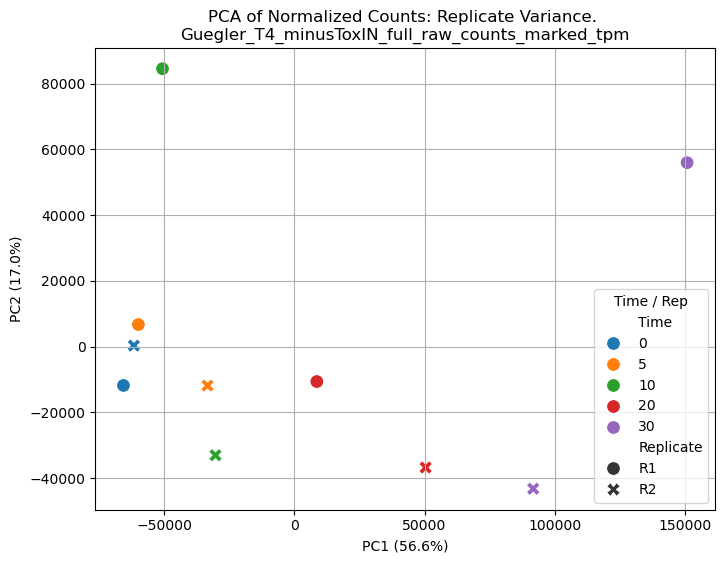

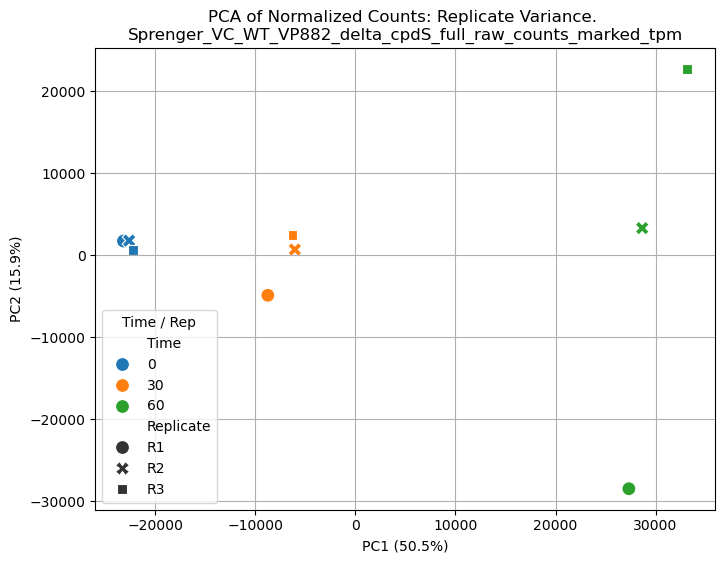

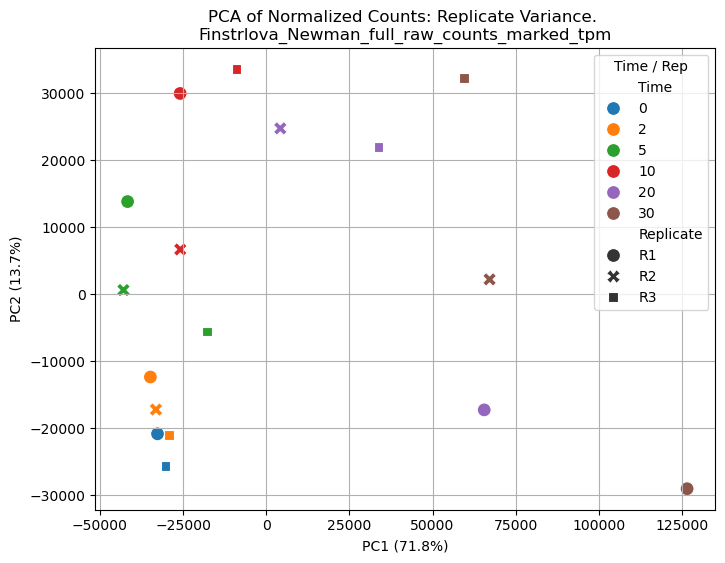

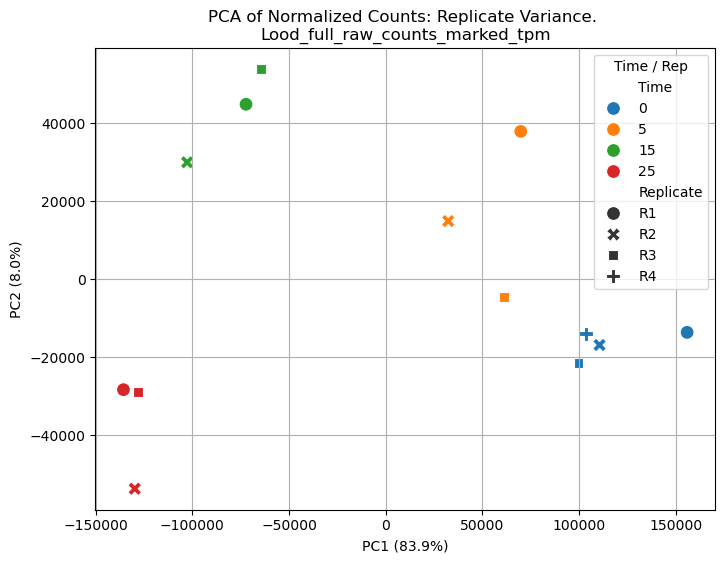

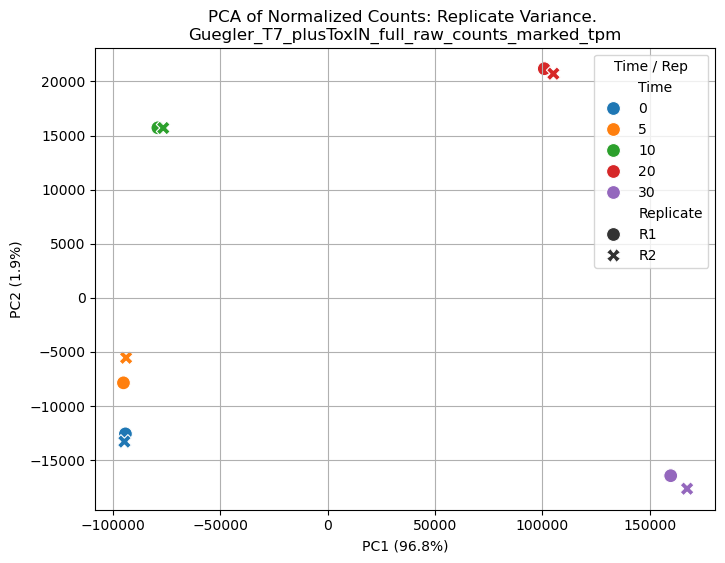

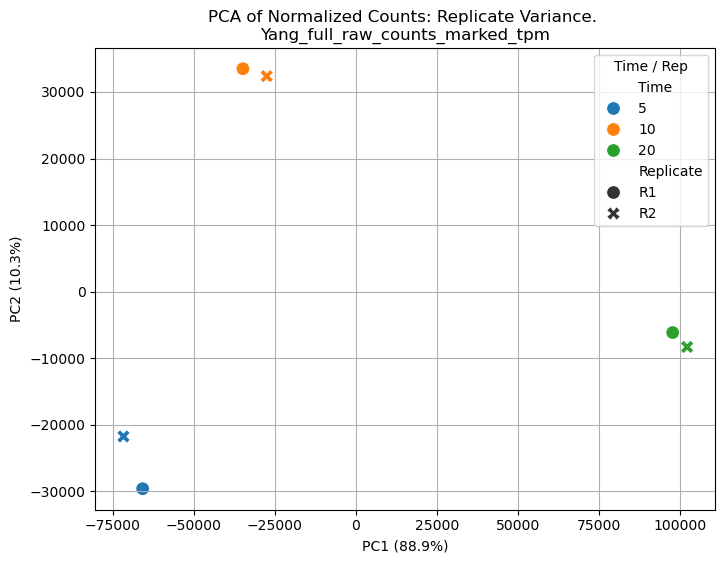

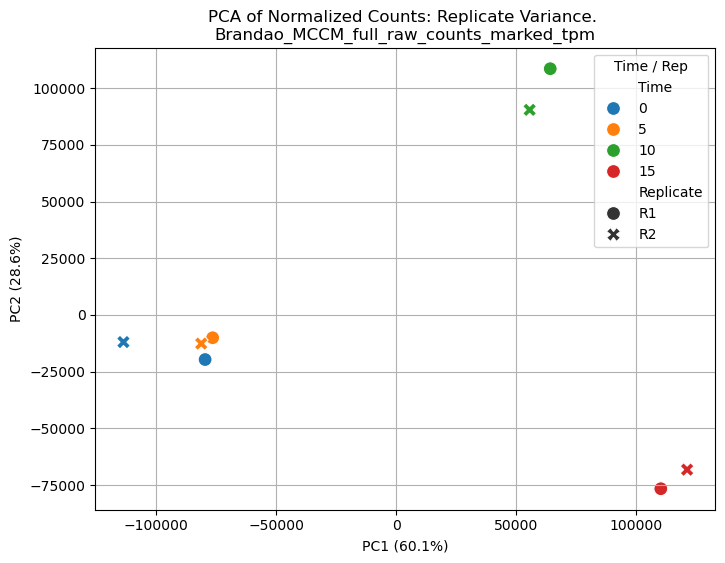

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import seaborn as sns
from pathlib import Path


def run_pca(df, set_name):
    # Get samples and drop the rest of the columns
    sample_cols = [col for col in df.columns if re.match(r"^\d+_R\d+$", col)]
    data = df[sample_cols]

    # print(data)

    # Transpose so samples are rows
    data_T = data.transpose()
    data_T.columns = df["Geneid"]  # Assign gene names as column headers
    data_T.index.name = "Sample"

    # Reset index to extract time point and replicate info
    data_T = data_T.reset_index()

    # Extract time and replicate into new columns
    data_T["Time"] = data_T["Sample"].apply(lambda x: x.split("_")[0])
    data_T["Replicate"] = data_T["Sample"].apply(lambda x: x.split("_")[1])

    # print(data_T)

    # Drop sample name and metadata
    features = data_T.drop(columns=["Sample", "Time", "Replicate"])

    # print(features)

    # Run PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)

    # Add PCA results to DataFrame
    data_T["PC1"] = pca_result[:, 0]
    data_T["PC2"] = pca_result[:, 1]

    # Plot PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data_T,
        x="PC1",
        y="PC2",
        hue="Time",
        style="Replicate",
        s=100,
        palette="tab10",
    )
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)")
    plt.title(f"PCA of Normalized Counts: Replicate Variance. \n{set_name}")
    plt.legend(title="Time / Rep")
    plt.grid(True)
    plt.show()


input_folder = Path("../data/datasets_normalized")
for ds in input_folder.glob("*.tsv"):
    df = pd.read_csv(ds, sep="\t")
    set_name = ds.stem
    run_pca(df, set_name)
